# Human Activity Recognition
The dataset, accuquired from WISDM Lab, consist of data collected from 36 different users performing six types of human activities (Ascending and descending stairs, sitting, jogging, and stadning) for specific periods of time.

These data were acquired from accelerometers, which are able of detecting the orientation of the device measuring the acceleration along the three different dimensions. They were collected using a sample rate of 20 HZ (1 sample every 50 millisecond) that is equivalent to 20 samples per second.

These time-series data can be used to perform various techniques, such as human activity recognition

Fields:
- user: the user who acquired the data (integer from 1 to 36)
- activity: the activity that the user was carrying out. It could be:
1. walking
2. Jogging
3. Sitting
4. Standing
5. Upstairs
6. Downstairs
- timestamp: generally the phone's uptime in nanoseconds.

- x-axis: The acceleration in the x direction as measured by the android phones'accelermoeter.

Floating-point values between -20 and 20. A value of 10 = 1g = 9.81m/s^2, and 0 = no acceleration.

The acceleration recorded includes gravitational acceleration toward the center of the Earth, so that when the phone is at rest on a flat surface the verticals axis will register +=-10

- y-axis: same as x-axis, but along y asix.
- z-axis: same as x-axis, but along z axis.

[reference: https://www.kaggle.com/code/docxian/human-activity-recognition-visual-exploration/notebook]

In [2]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
# Load Data
df = pd.read_csv('time_series_data_human_activities.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


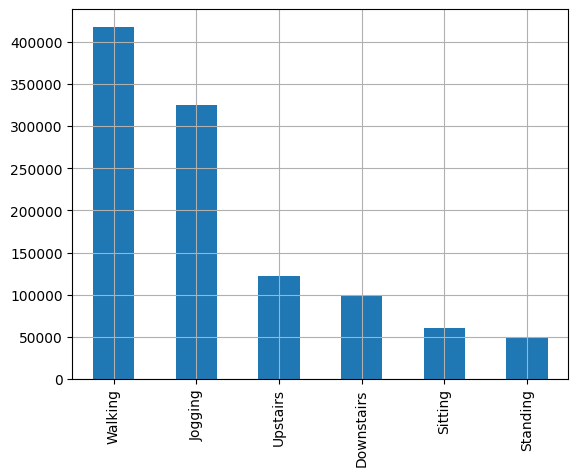

['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']


In [8]:
activities_stats = df['activity'].value_counts()
activities = activities_stats.index.to_list()
activities_stats.plot(kind='bar')
plt.grid()
plt.show()
print(activities)


In [9]:
pd.crosstab(df.user, df.activity)

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
1,2941,11056,0,0,3120,12861
2,0,11786,0,0,0,11739
3,3326,11018,1609,2824,3411,12970
4,1761,895,1257,0,1377,6079
5,3281,6405,1664,1515,3387,12257
6,1431,10961,1679,709,1661,12262
7,2257,9183,2529,2364,3601,11033
8,3345,10313,2699,3269,4453,17108
9,0,0,0,0,0,12923


### Look at specifit user

한 유저의 데이터를 통해서 일반화할 수 없으니, null 데이터가 존재하지 않는 3,5,6,7의 데이터를 확인해봄. 비교 정리는 3,5 데이터의 경우만 정리했고 6,7 데이터는 확인만 함.

### Time Series Plot

In [ ]:
### 유저 선택에 따른 time series 함수
def time_series_plot(sel_user, df_user):
    for act in activities:
        df_temp = df_user.loc[df.activity == act].copy()
        df_temp.reset_index(inplace = True) 

        # convert time to seconds and start with 0
        t_min = df_temp.timestamp.min()
        df_temp['time_sec'] = (df_temp['timestamp'] - t_min) / 1e9 # 센서 데이터의 경우 나노초(ns, nanoseconds)단위로 기록되는 경우가 많음 1e9는 10억을 의미하며, 이는 1초에 해당하는 나노초의수(1초 =1,000,000,000 나노초) -> 나노초를 초 단위 시간으로 바꾸면 데이터 분석과 플롯 해석이 편해짐.

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (14, 6), sharex = True)

        ax1.plot(df_temp['time_sec'], df_temp['x-axis'], color = 'red', alpha = 0.5)
        ax1.set_ylim(-20, 20)
        ax1.set_title('user =' + str(sel_user) + ' / ' + act + ' - x')
        ax1.grid()

        ax2.plot(df_temp['time_sec'], df_temp['y-axis'], color = 'green', alpha = 0.5)
        ax2.set_ylim(-20, 20)
        ax2.set_title('user =' + str(sel_user) + ' / ' + act + ' -y ')
        ax2.grid()

        ax3.plot(df_temp['time_sec'], df_temp['z-axis'], color = 'blue', alpha = 0.5)
        ax3.set_ylim(-20, 20)
        ax3.set_title('user =' + str(sel_user) + ' / ' + act + ' -z')
        ax3.grid()

        plt.show()

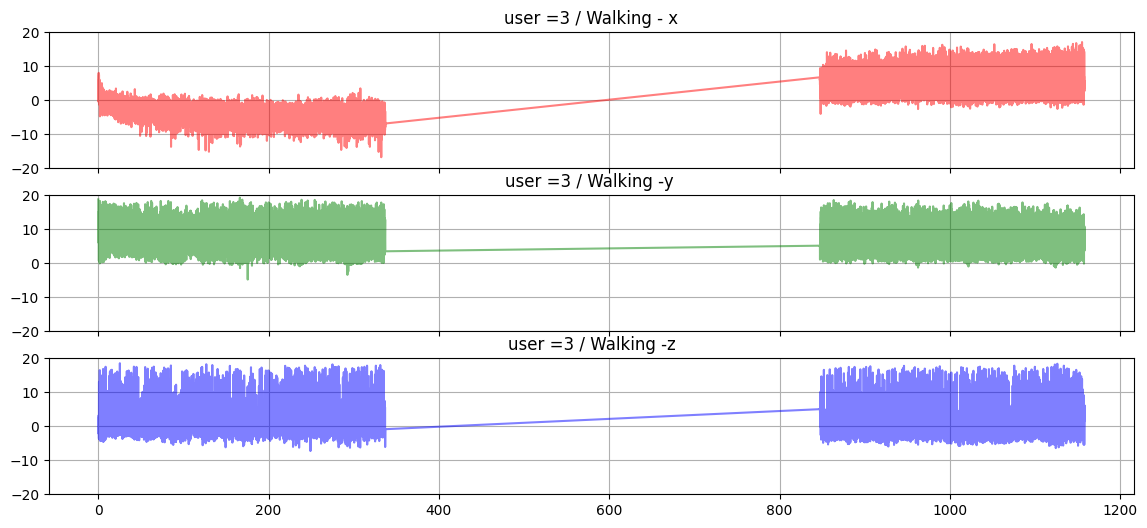

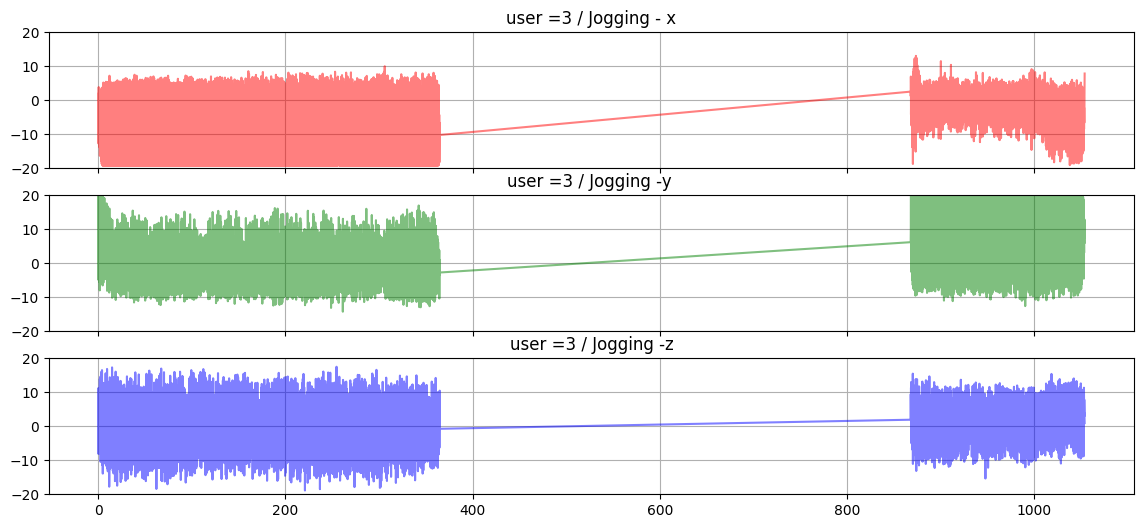

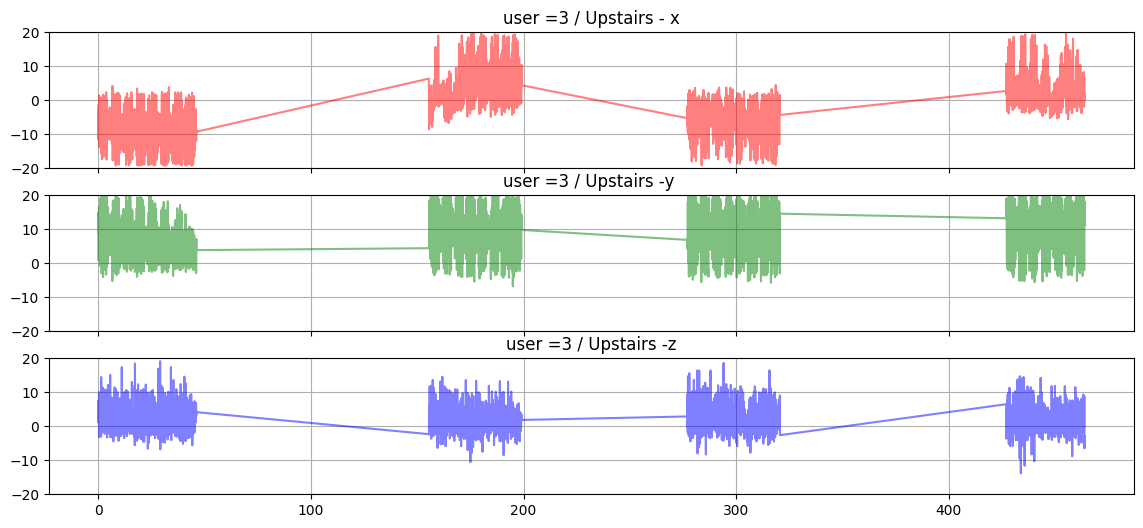

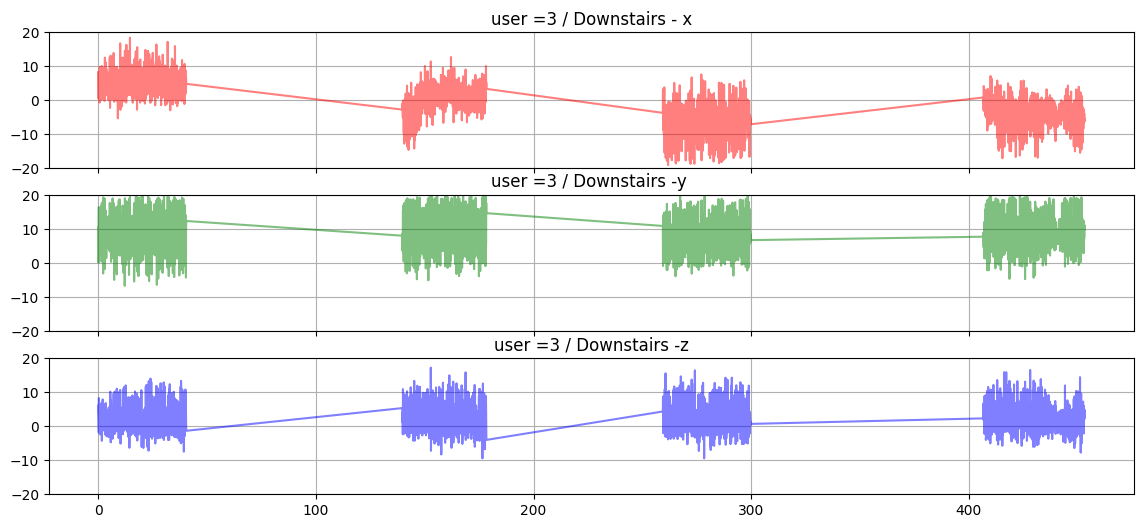

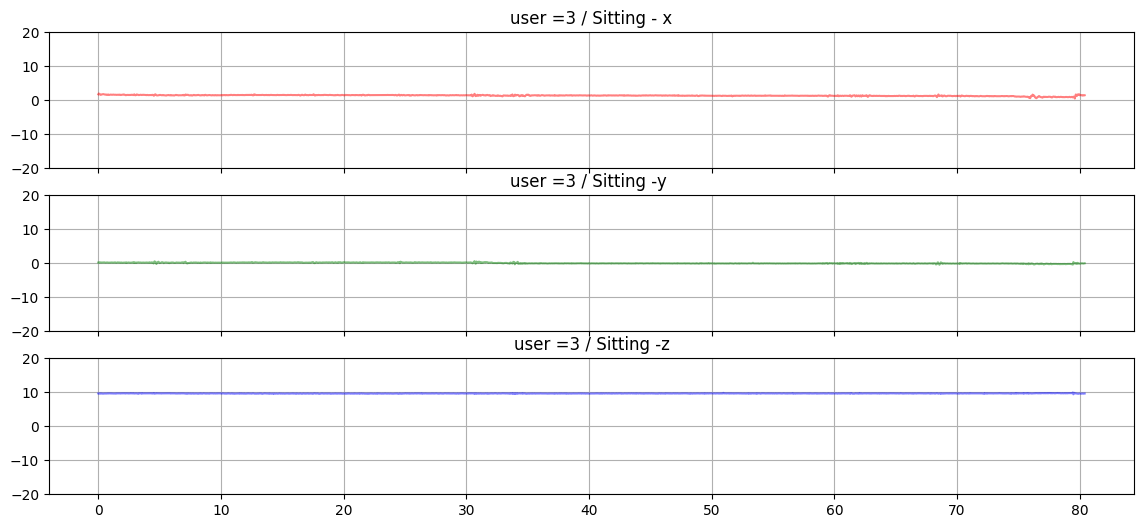

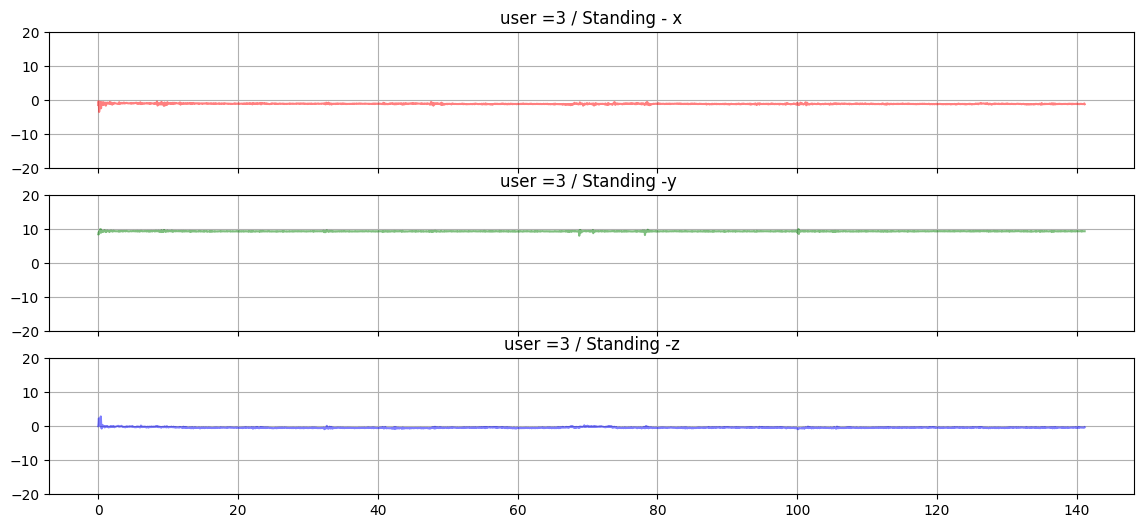

In [24]:
sel_user = 3
df_user = df[df.user == sel_user]
time_series_plot(sel_user, df_user)

초 단위가 막대그래프로 있는 이유는 -> 연속적인 이유가 아니라 막대그래프로 있는 이유는 특정 시간 구간(1초) 동안의 값을 집계하여 바 플롯으로 나타내는 것
각각의 데이터가 초 단위로 모여지는게 아니라 0.05초마다 수집되고 있음
- 이 0.05초 데이터 마다 그래프를 그리면 플롯이 너무 복잡해서 해석하기 어려움. 초 단위로 묵어서 보여주는 방식이 좋음
각 막대기가 0~8사이의 값으로 변동 범위를 보인다면, 그 1초 동안 가속도가 0~8로 변했다는 것을 보여줌 (여기서는 평균, 표준편차, 분산 그런 특정 값을 사용한 것 이 아닌 각 초당 최소 ~ 최대 값을 보여준 것 같음)
특정 구간에서 값이 없고 일직선으로 이어진 데이터 값의 경우 (그 시간에는 멈췄다는 신호)

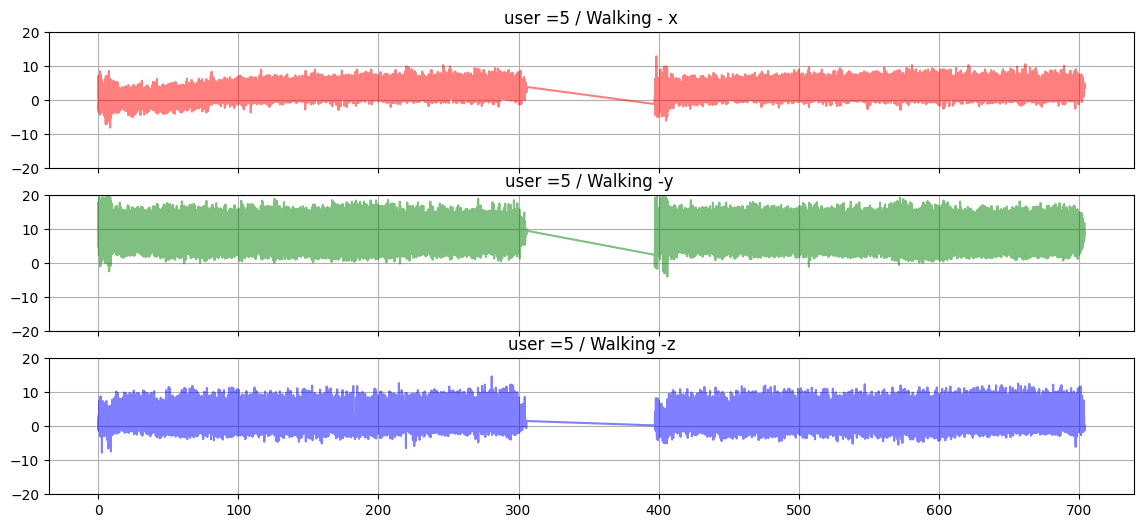

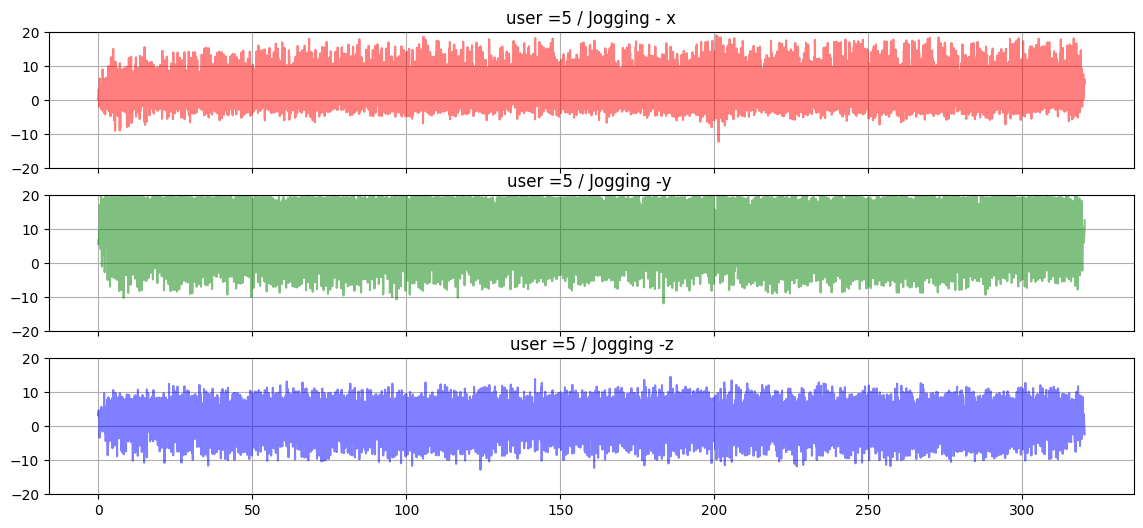

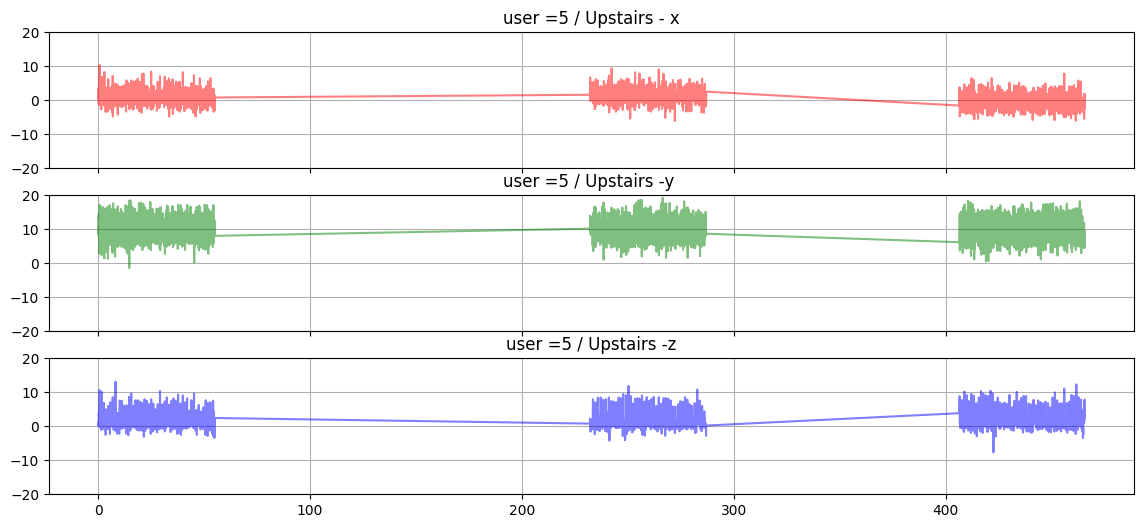

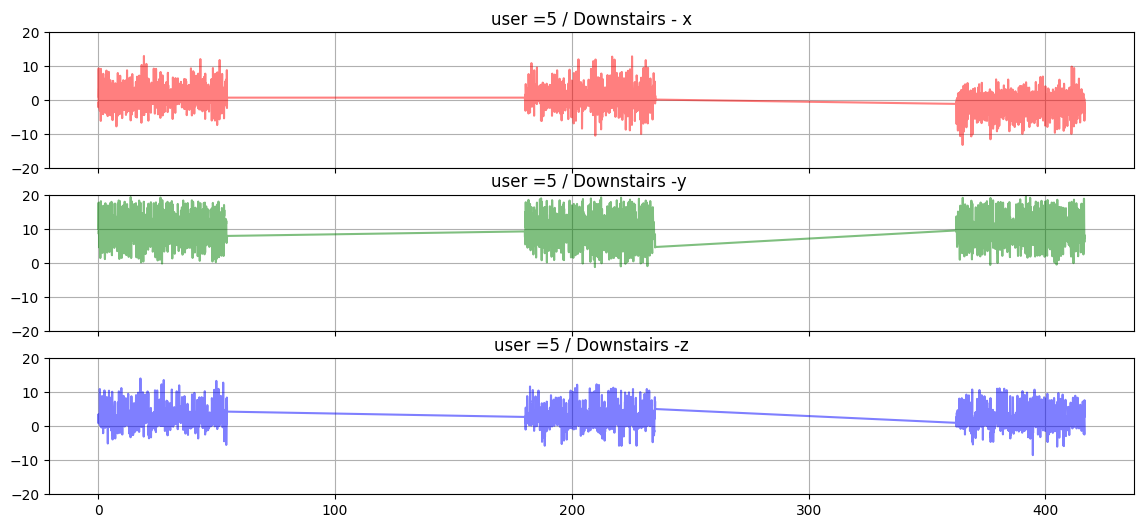

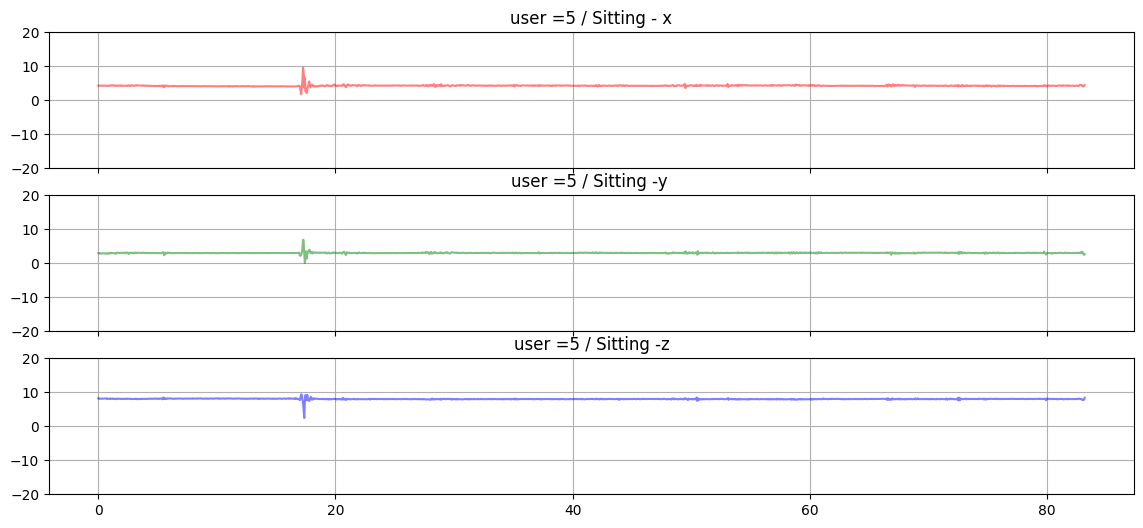

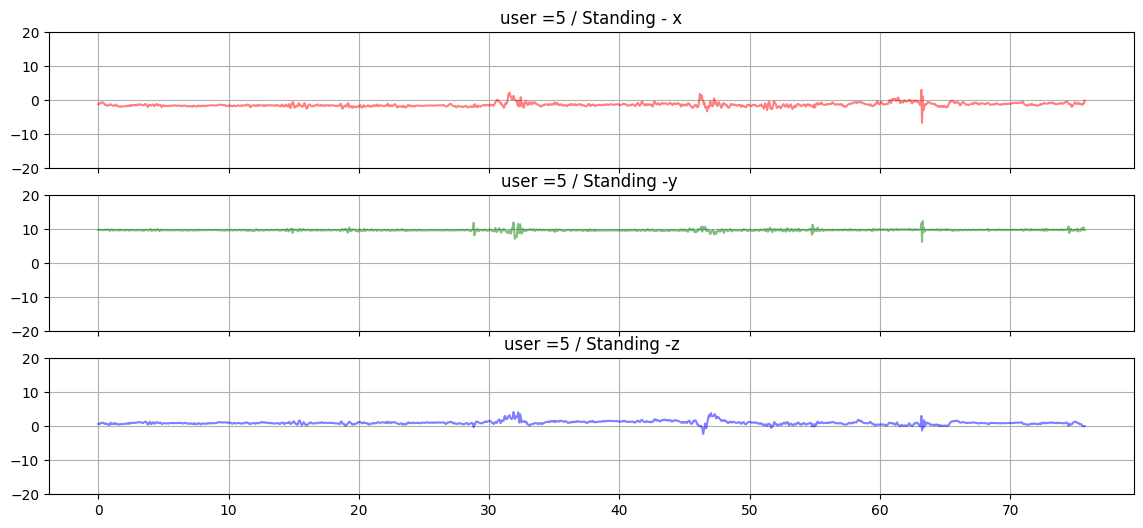

In [25]:
sel_user = 5
df_user = df[df.user == sel_user]
time_series_plot(sel_user, df_user)

## 사용자 3와 사용자 5의 활동 데이터 분석
### 1. Walking (걷기)

사용자 3:

- x축: 초당 진폭 약 10으로 왔다갔다하며, 후반부 데이터가 전반부보다 높음.

- y축: 초당 진폭 약 20으로 왔다갔다하며, 일정해 보임. 좌우 이동의 리듬적 패턴을 반영.

- z축: 초당 진폭 약 20으로 왔다갔다하며, 일정해 보임. 발걸음의 수직 움직임을 나타냄.

사용자 5:

- x축: 초당 진폭 약 10으로 일정하며, 사용자 3보다 데이터 길이(행 = 700)가 짧음. 걷기가 더 빠르거나 짧은 거리를 걸은 것으로 추정.

- y축, z축: 사용자 3와 비슷하게 초당 진폭 약 20으로 일정해 보임.

비교 및 해석: 두 사용자의 걷기 패턴은 진폭은 유사하지만, 사용자 5는 더 짧은 시간 동안 걷는 경향을 보임. 전반적인 데이터 길이 차이는 걸음 속도나 거리 차이로 해석 가능.

### 2. Jogging (조깅)

사용자 3:

공통: 후반부 데이터가 전반부보다 적음.(0 ~ 350 / 850 ~ 1000 - 조깅 데이터 2번 나타남)

- x축: 초당 진폭 약 30으로 왔다갔다하며, 큰 변동성 보임.

- y축: 초당 진폭 약 25으로 왔다갔다하며, 상대적으로 안정적.

- z축: 초당 진폭 약 30으로 왔다갔다하며, 수직 충격이 두드러짐.

사용자 5:

공통: 후반부 데이터가 없고, 0~300초 동안만 조깅이 발생.

- x축: 초당 진폭 약 25으로 왔다갔다하며, 사용자 3보다 진폭이 약간 작음.

- y축: 초당 진폭 약 30으로 왔다갔다하며, 사용자 3보다 진폭이 크고 변동성 큼.

- z축: 초당 진폭 약 20으로 왔다갔다하며, 사용자 3보다 진폭이 작음.

비교 및 해석: 두 사용자의 조깅 패턴은 진폭과 지속 시간에서 차이가 큼. 사용자 5는 더 짧고 덜 격렬한 조깅을 한 것으로 보이며, 사용자 3는 더 긴 시간 동안 조깅하며 더 큰 수직 충격(z축)을 보임.

### 3. Upstairs (계단 오르기)

사용자 3:

공통: 총 4번의 계단 오르기를 진행한 것으로 추정, 패턴이 뚜렷함.

- x축: 초당 진폭 약 20으로 왔다갔다하며, 전반적으로 상승 추세 보임.

- y축: 초당 진폭 약 20(0~20)으로 왔다갔다하며, 안정적.

- z축: 초당 진폭 약 20(-10~10)으로 왔다갔다하며, 수직 움직임 강조.

사용자 5:

공통: 총 3번의 계단 오르기를 진행한 것으로 추정, 패턴 존재.

- x축: 초당 진폭 약 10(0~10)으로 왔다갔다하며, 사용자 3보다 진폭 작음.

- y축: 초당 진폭 약 20(0~20)으로 왔다갔다하며, 사용자 3와 유사.

- z축: 초당 진폭 약 10(0~10)으로 왔다갔다하며, 사용자 3보다 진폭 작음.

비교 및 해석: 두 사용자는 계단 오르기 패턴이 비슷하지만, 사용자 5는 더 적은 계단 수(3번 vs 4번)와 작은 진폭을 보임. x축 데이터는 상승 추세로 활동 구분에 유용할 수 있음.

### 4. Downstairs (계단 내려가기)

사용자 3:

공통: 총 4번의 계단 내려가기를 진행한 것으로 추정, 패턴 뚜렷함.

- x축: 초당 진폭 약 20으로 왔다갔다하며, 전반적으로 하락 추세 보임.

- y축: 초당 진폭 약 20(0~20)으로 왔다갔다하며, 안정적.

- z축: 초당 진폭 약 20(-10~10)으로 왔다갔다하며, 수직 움직임 강조.


사용자 5:

공통: 총 4번의 계단 내려가기를 진행한 것으로 추정, 패턴 존재.

- x축: 초당 진폭 약 20(-10~10)으로 왔다갔다하며, 사용자 3와 유사.

- y축: 초당 진폭 약 20(0~20)으로 왔다갔다하며, 사용자 3와 유사.

- z축: 초당 진폭 약 20(0~10)으로 왔다갔다하며, 사용자 3와 유사.

비교 및 해석: 계단 오르기와 내려가기 데이터가 매우 비슷하며, x축의 상승/하락 추세로 구분 가능. 사용자 간 차이는 미미하지만, 사용자 5의 z축 진폭이 약간 더 작음.

### 5. Sitting (앉기)

사용자 3:

공통: 진폭 거의 없음.

- x축: 약 1값에서 안정적으로 머무름.

- y축: 약 0값에서 안정적으로 머무름.

- z축: 약 10값에서 안정적으로 머무름.

사용자 5:

공통: 진폭 거의 없음.

- x축: 약 5값에서 안정적으로 머무름.

- y축: 약 2값에서 안정적으로 머무름.

- z축: 약 9값에서 안정적으로 머무름.

비교 및 해석: 두 사용자의 앉기 데이터는 진폭이 거의 없어 안정적이지만, x, y, z 값이 사용자마다 다르기 때문에 구분 가능. 센서 위치나 자세 차이로 해석 가능.

### 6. Standing (서기)

사용자 3:

- x축: 약 -1값에서 안정적으로 머무름.

- y축: 약 10값에서 안정적으로 머무름.

- z축: 약 0값에서 안정적으로 머무름.

사용자 5:

- x축: 약 -1값에서 안정적으로 머무름.

- y축: 약 10값에서 안정적으로 머무름.

- z축: 약 0값에서 안정적으로 머무름.

비교 및 해석: 두 사용자의 서기 데이터는 x, y, z 값이 거의 동일해 구분이 어려움. 하지만 앉기와는 x, y, z 값 차이로 구분 가능.

### 활동 구분 가능성
- Sitting vs Standing: 두 활동 모두 진폭이 거의 없지만, x, y, z 값이 사용자마다 다르기 때문에 구분 가능. 특히, 앉기와 서기의 x, y, z 값 차이를 활용하면 효과적.

- Upstairs vs Downstairs: x축의 상승(오르기)과 하락(내려가기) 추세로 구분 가능하며, 사용자 간 패턴은 유사하지만 계단 수와 진폭 차이로 세부 구분 가능.

- Walking vs Jogging: 진폭 크기와 주기성으로 구분 가능. 조깅은 걷기보다 진폭이 크고 빠른 주기성을 보임. 사용자 간에는 지속 시간과 진폭 차이로 구분 가능.

### 종합적인 인사이트
사용자 3와 5는 비슷한 활동 패턴을 보이지만, 걷기와 조깅에서 지속 시간과 진폭 차이가 두드러짐. 사용자 5는 활동 시간이 짧고, 일부 활동(조깅, 계단 오르기)에서 진폭이 더 작음.

앉기와 서기는 진폭이 거의 없어 안정적이지만, x, y, z 값 차이를 통해 구분 가능.

계단 오르기와 내려가기는 패턴이 유사하지만, x축 추세로 구분 가능.



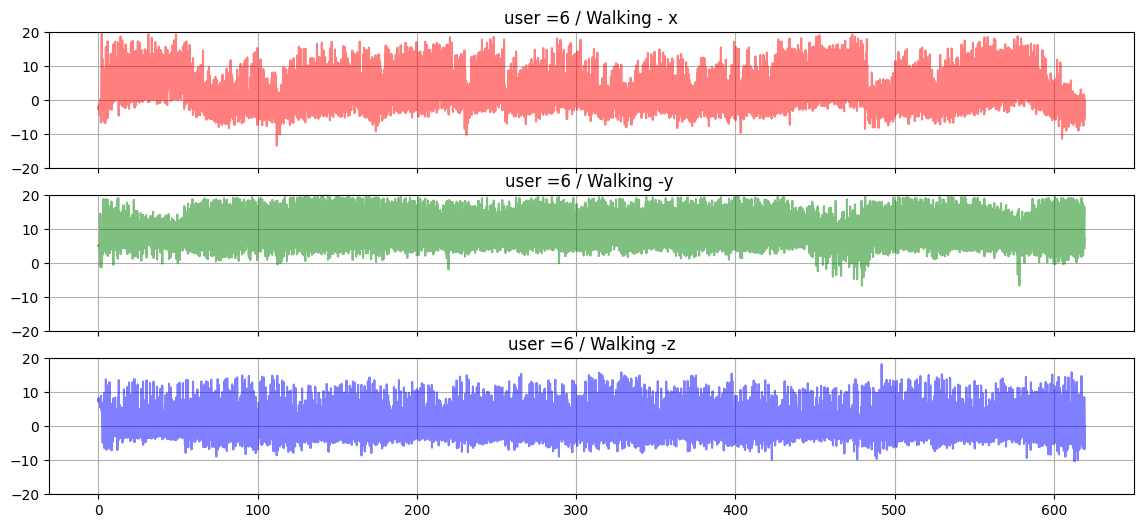

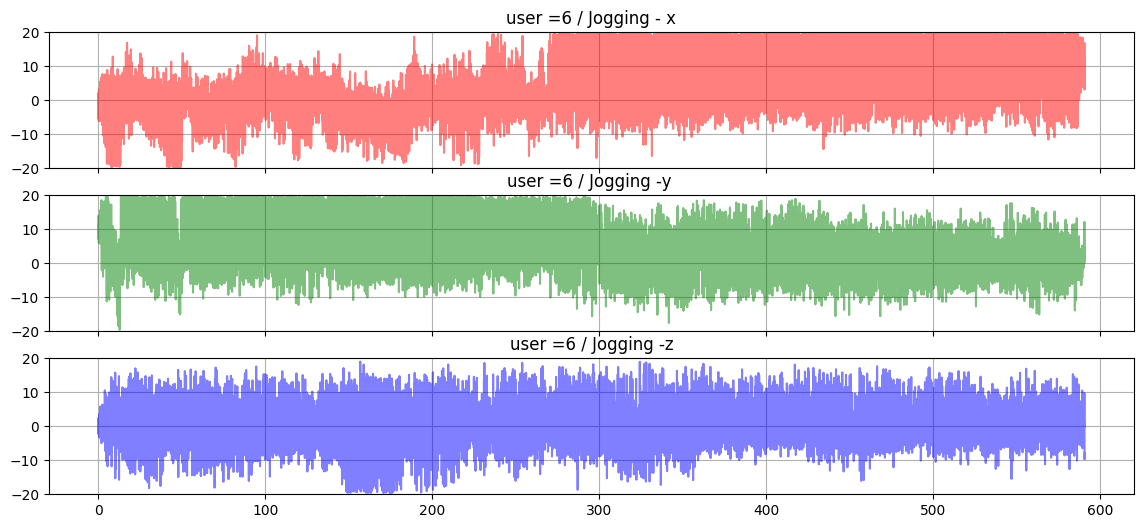

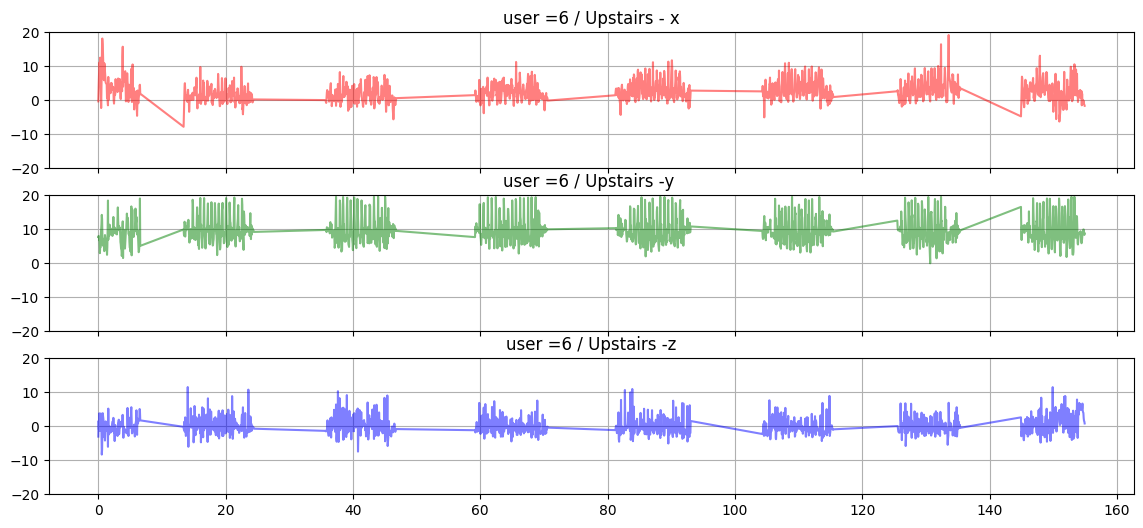

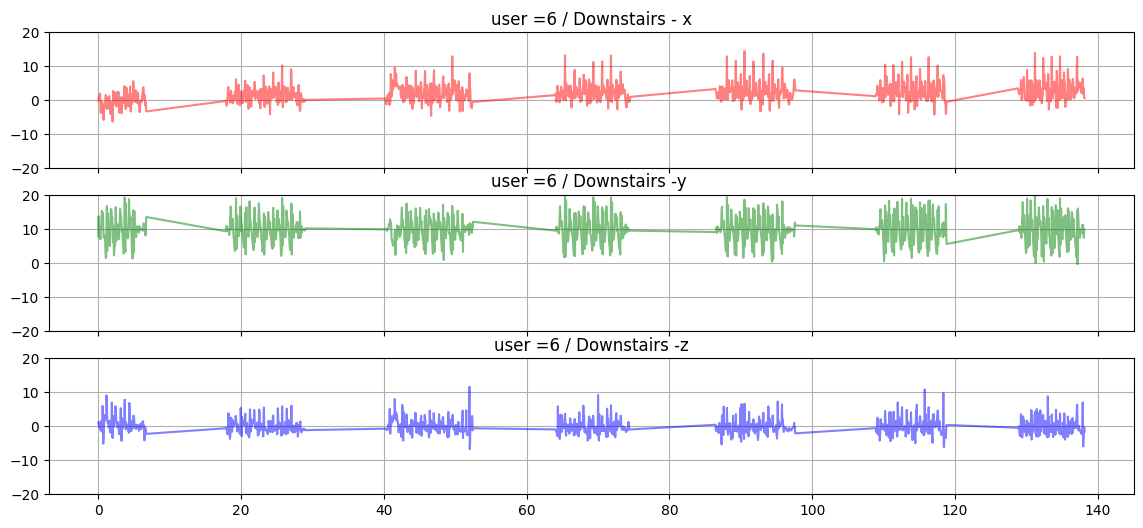

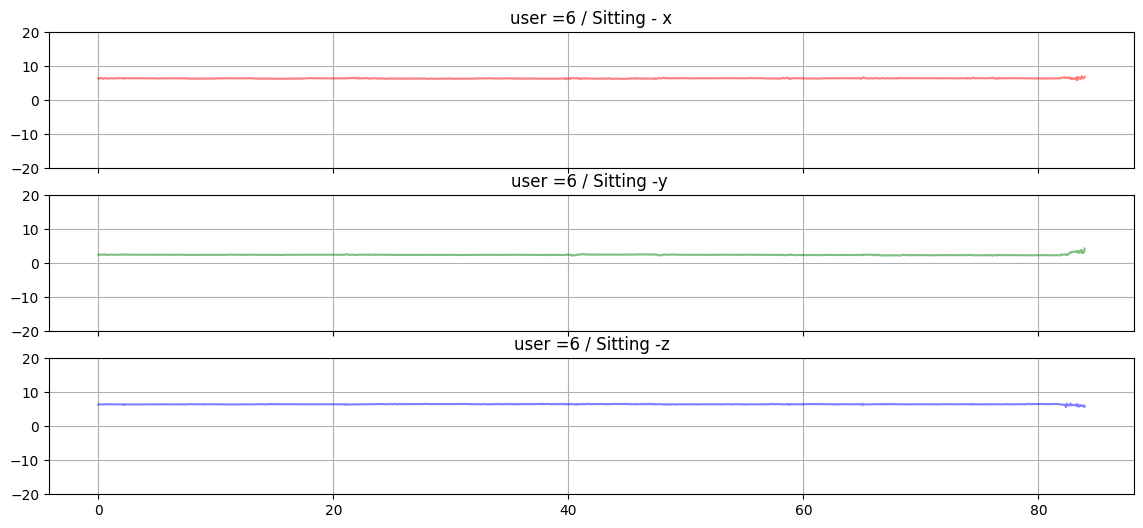

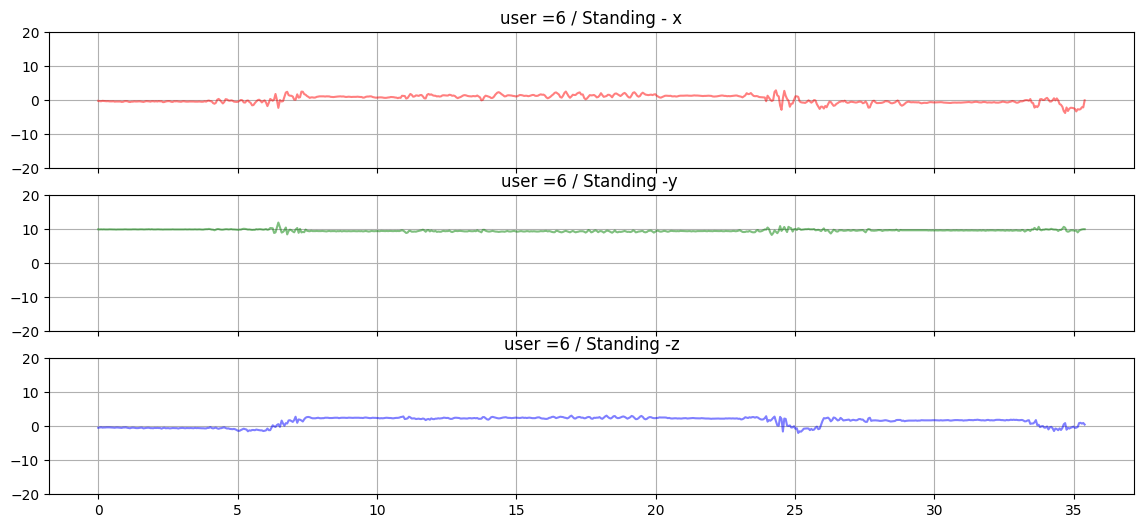

In [26]:
sel_user = 6
df_user = df[df.user == sel_user]
time_series_plot(sel_user, df_user)

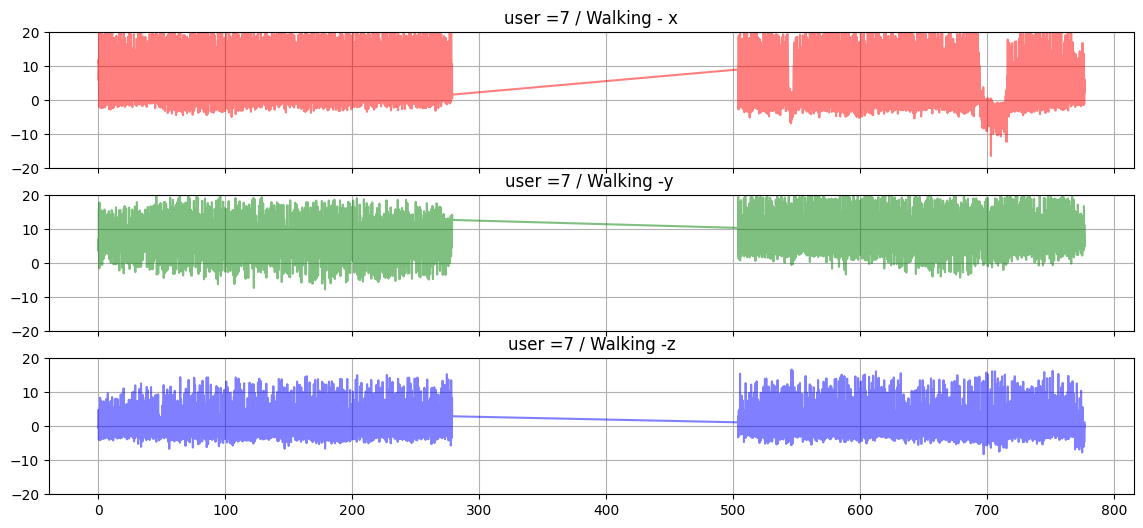

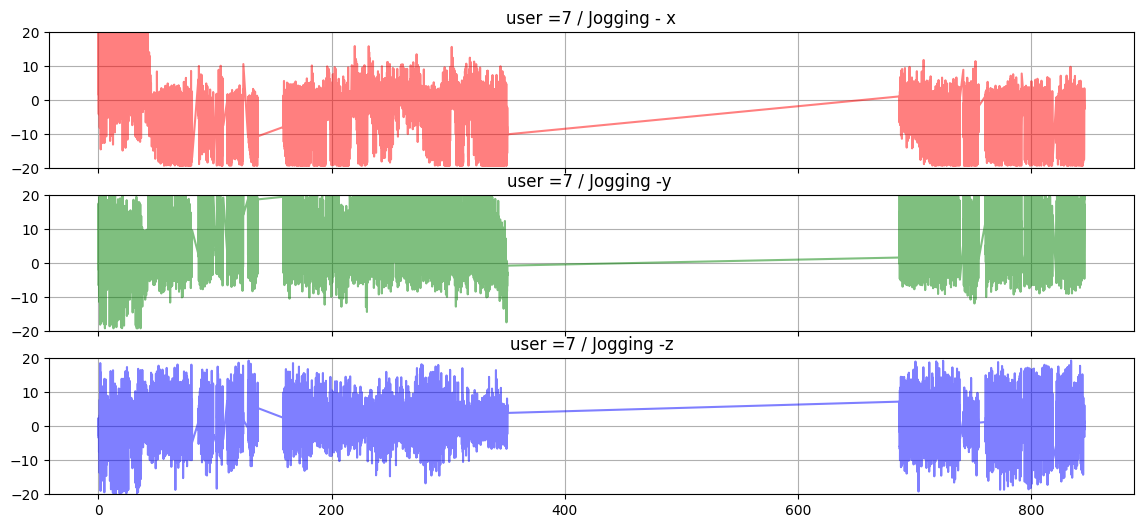

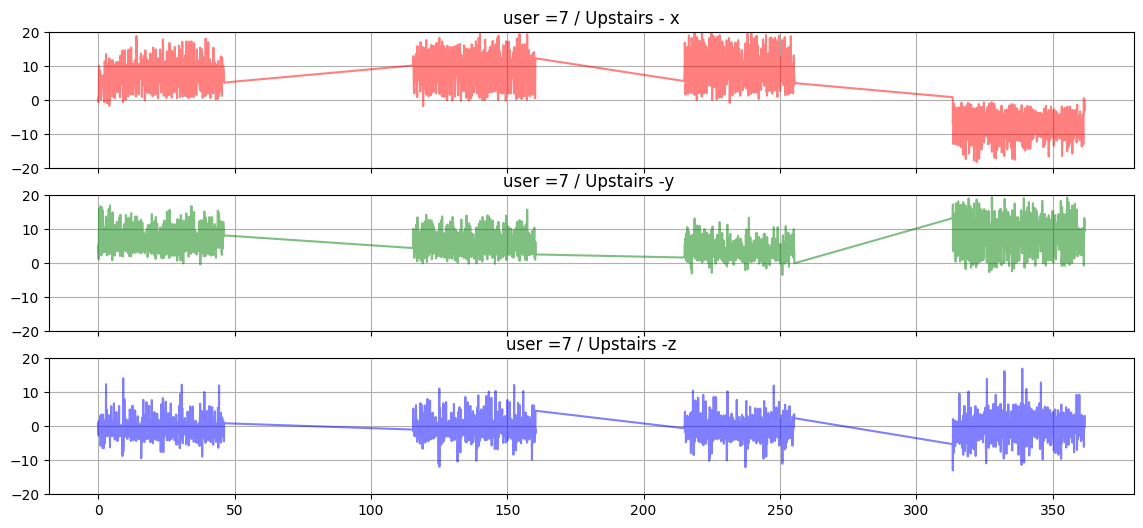

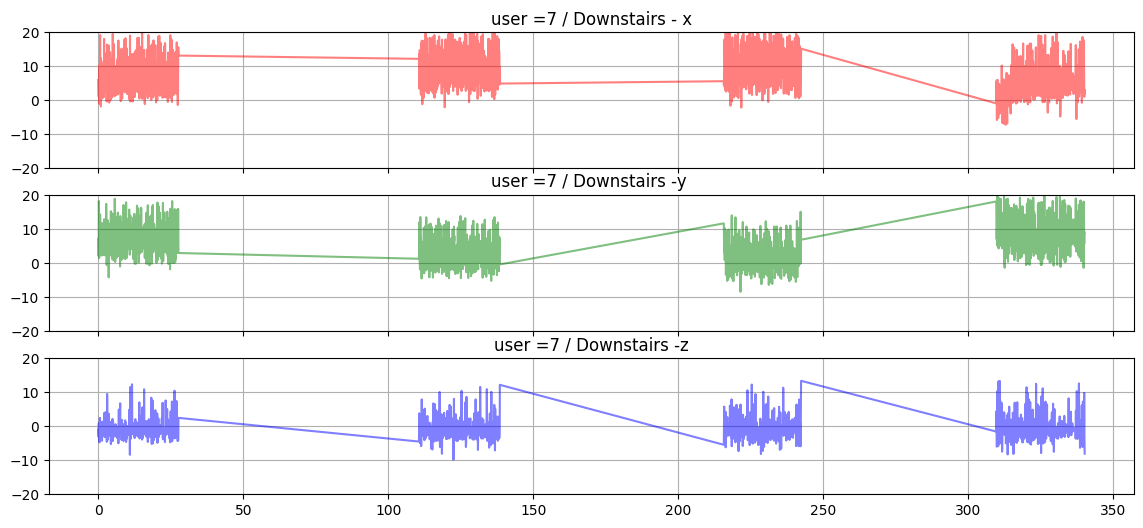

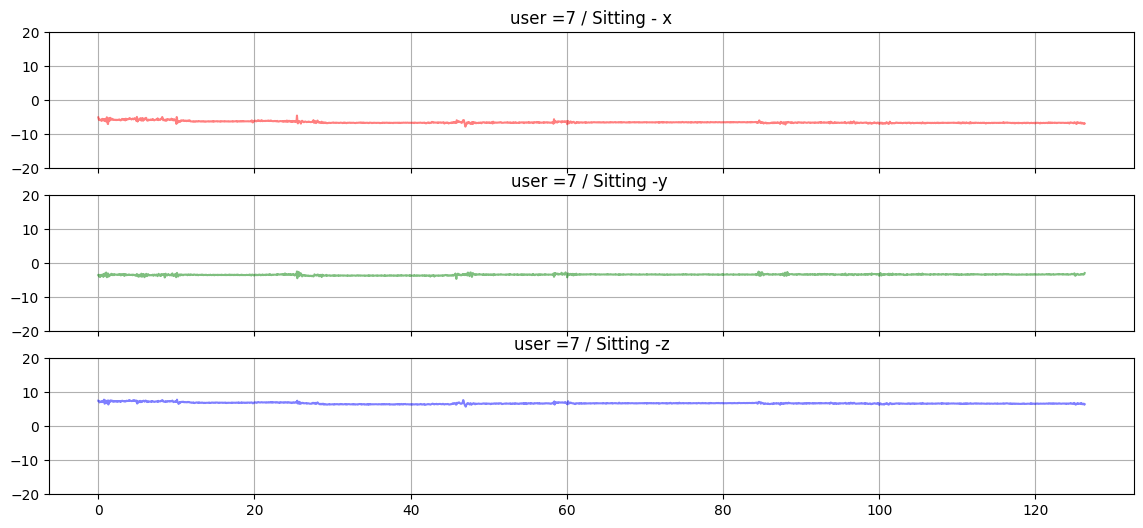

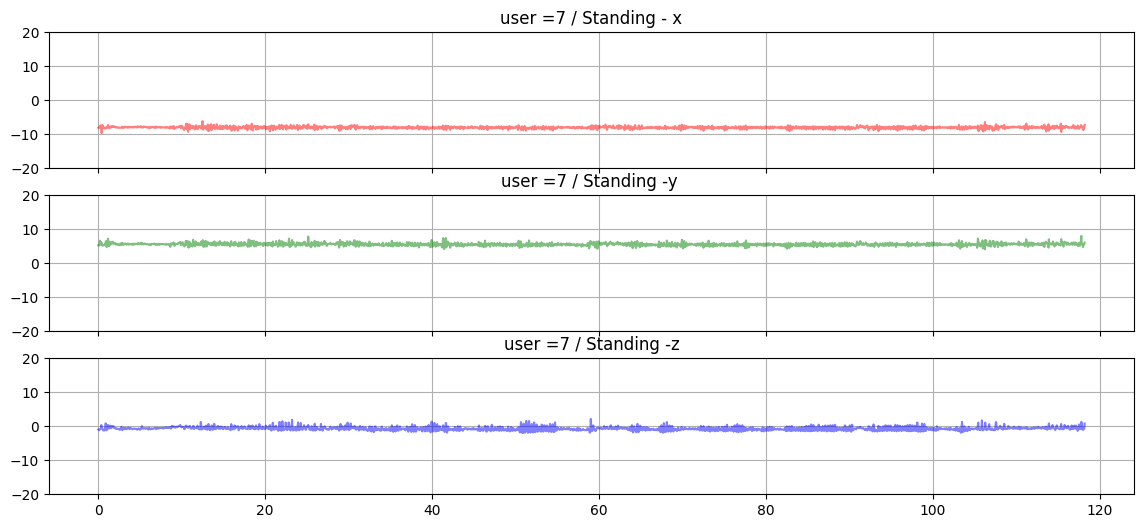

In [27]:
sel_user = 7
df_user = df[df.user == sel_user]
time_series_plot(sel_user, df_user)

### Distribution Plots

In [35]:
def distribution_plot(sel_user, df_user):
    n_bins = 100

    for act in activities:
        df_temp = df_user.loc[df.activity == act].copy()
        df_temp.reset_index(inplace = True)
        
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (14, 6), sharex = True) # sharex = True : 전체 그래프 x축 공유

        ax1.hist(df_temp['x-axis'], bins = n_bins, color = 'red', alpha = 0.5)
        ax1.set_xlim(-20, 20)
        ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' -x ')
        ax1.grid()
        
        ax2.hist(df_temp['y-axis'], bins = n_bins, color = 'green', alpha = 0.5)
        ax2.set_xlim(-20, 20)
        ax2.set_title('user =' + str(sel_user) + ' / ' + act + ' - y')
        ax2.grid()

        ax3.hist(df_temp['z-axis'], bins = n_bins, color = 'blue', alpha = 0.5)
        ax3.set_xlim(-20, 20)
        ax3.set_title('user =' + str(sel_user) + ' / ' + act + ' -z ')
        ax3.grid()

        plt.show()

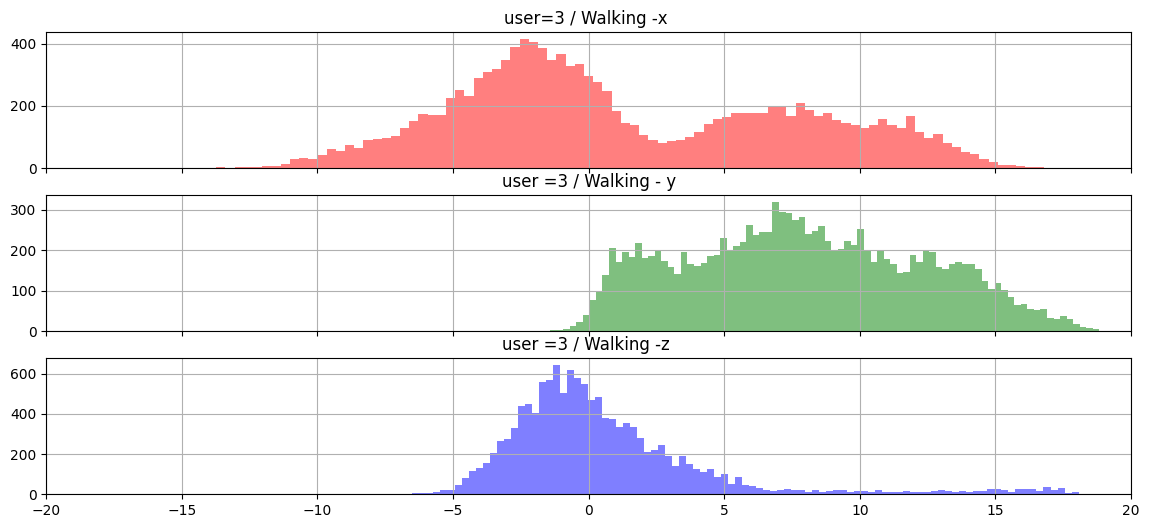

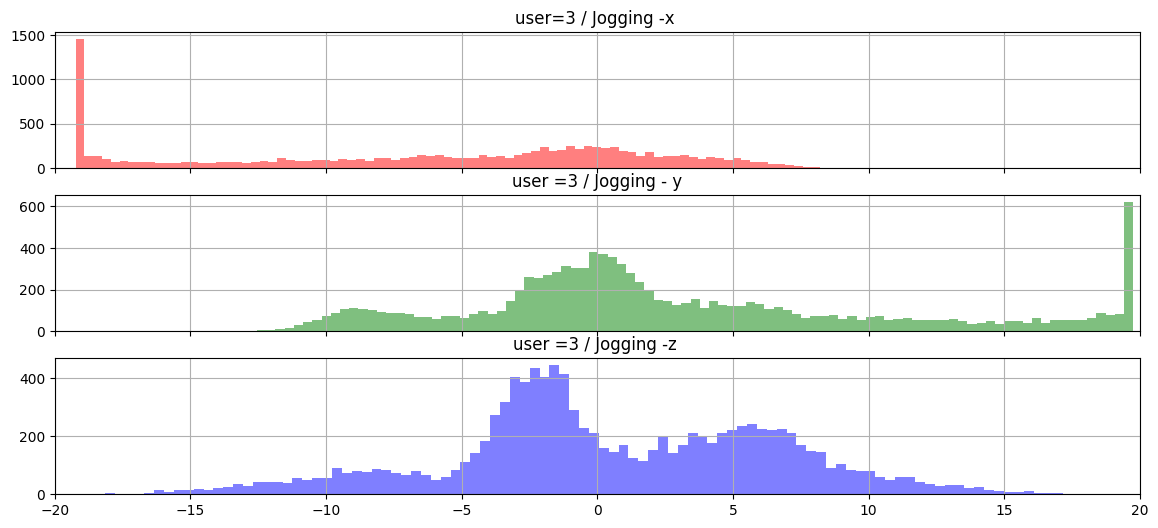

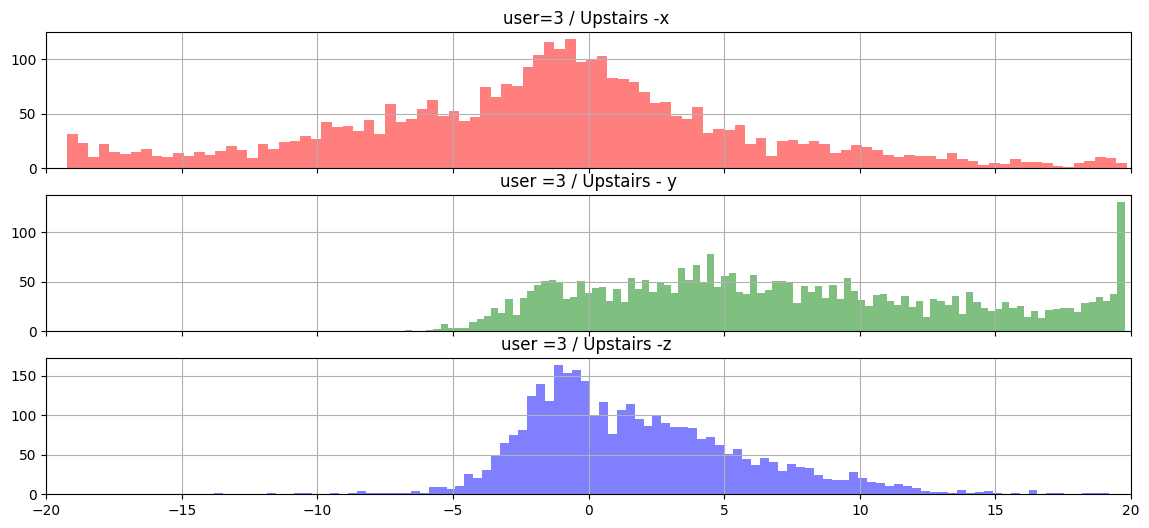

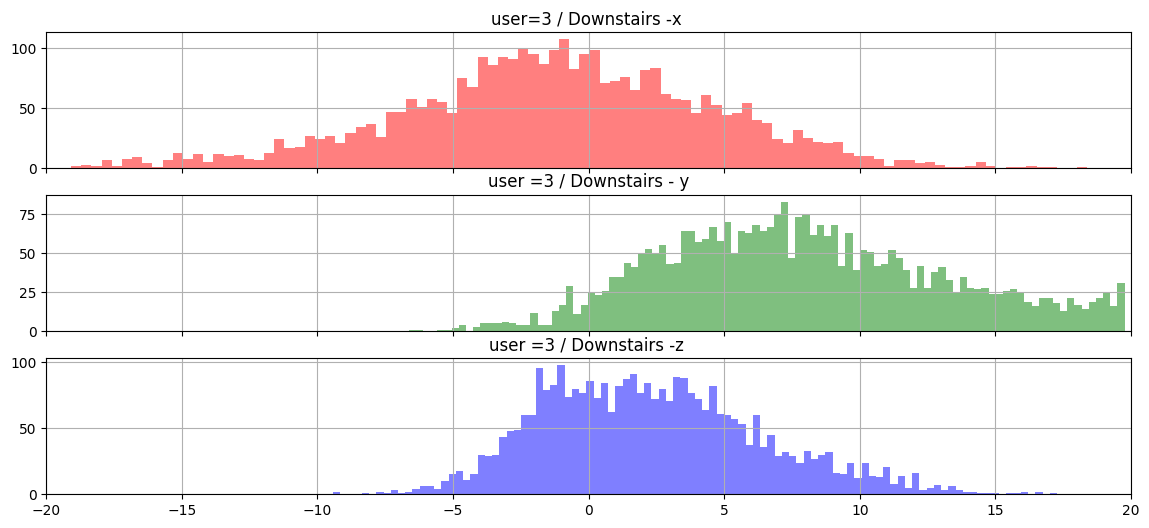

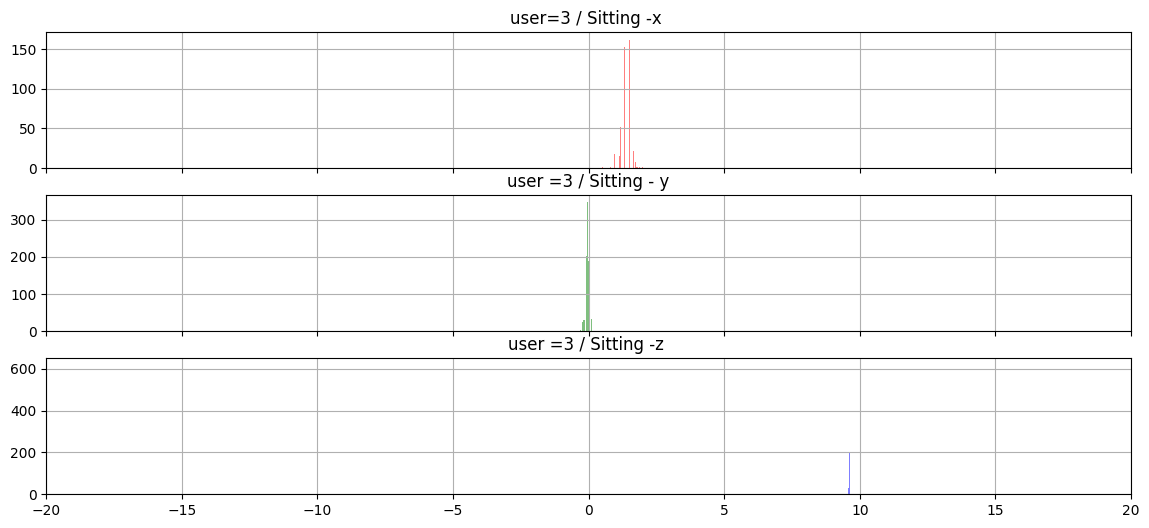

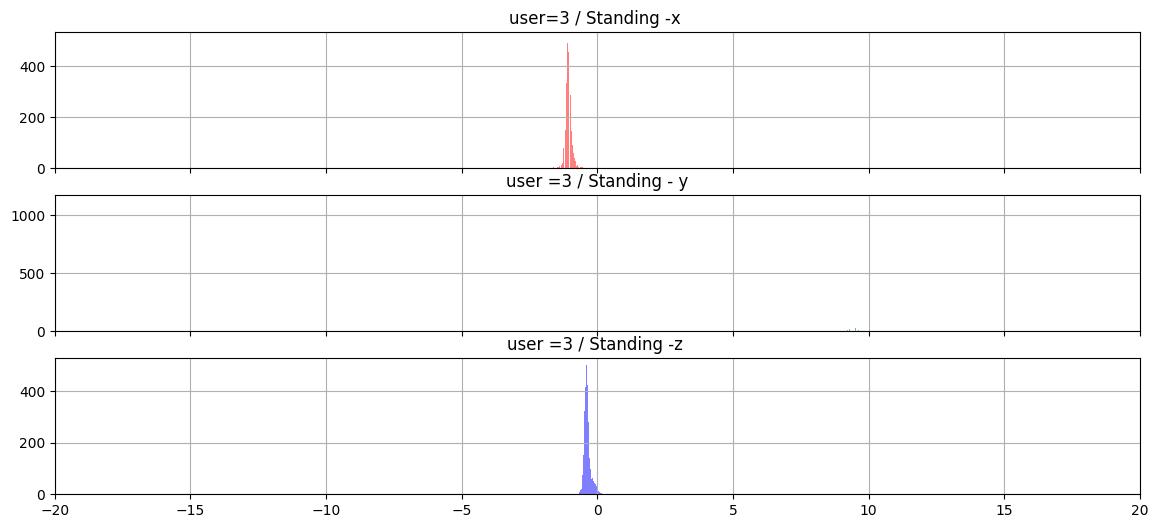

In [36]:
sel_user = 3
df_user = df[df.user == sel_user]
distribution_plot(sel_user, df_user)

### Scatter Plots

In [44]:
def scatter_plots(sel_user, df_user):
    for act in activities:
        df_temp = df_user.loc[df.activity == act].copy()
        df_temp.reset_index(inplace = True)

        t_min = df_temp.timestamp.min()
        df_temp['time_sec'] = (df_temp['timestamp'] - t_min) / 1e9

        print(act, ':')
        sns.pairplot(data = df_temp[['x-axis', 'y-axis', 'z-axis']], plot_kws = dict(s=2))
        plt.show()

Walking :


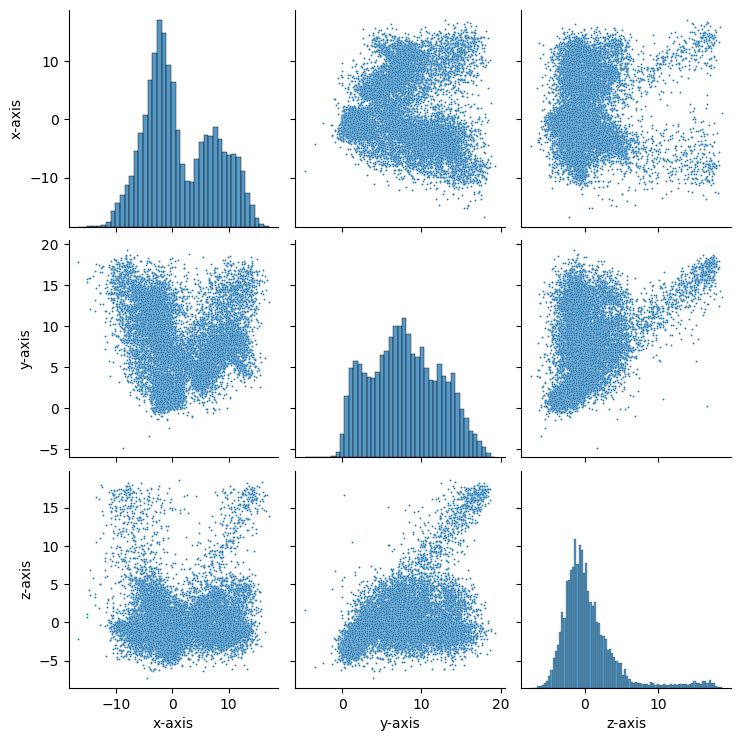

Jogging :


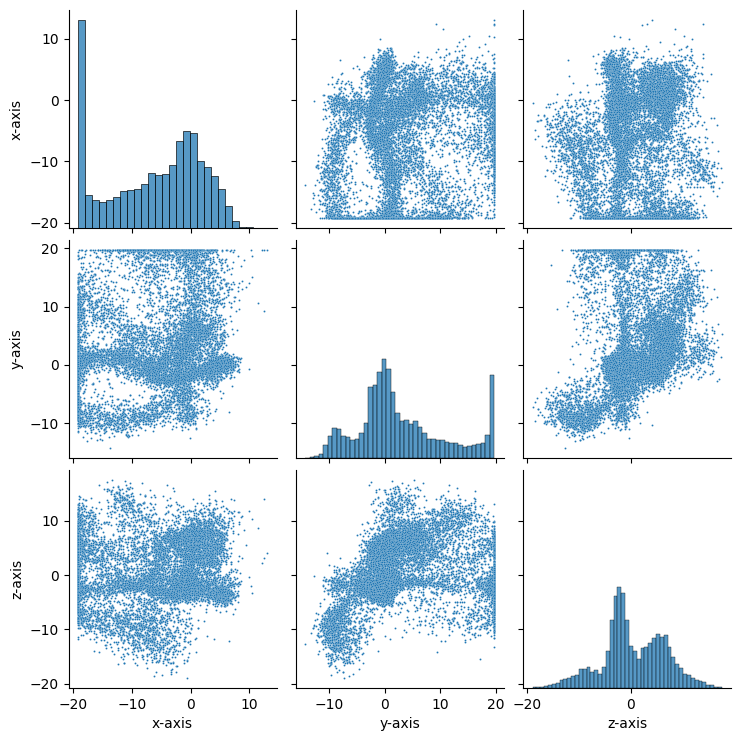

Upstairs :


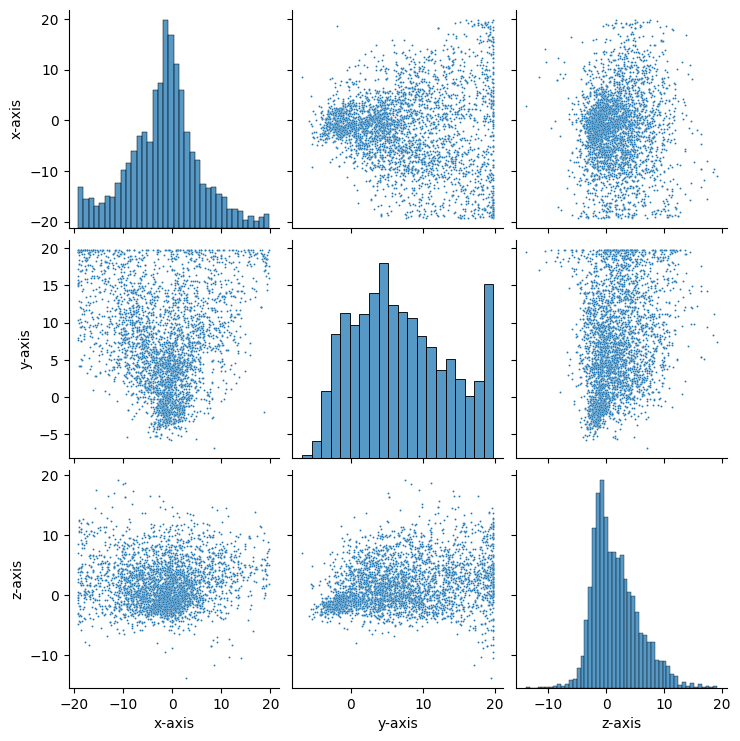

Downstairs :


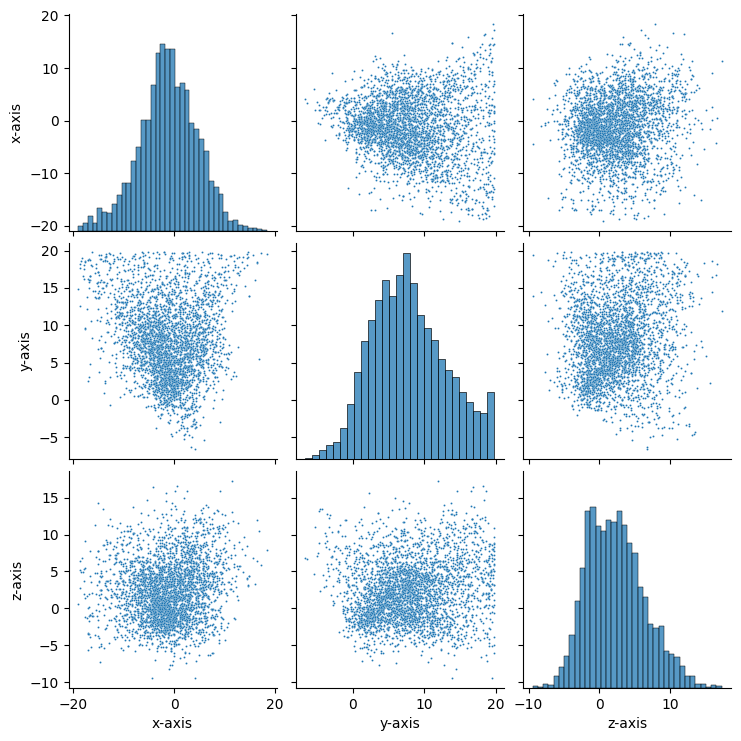

Sitting :


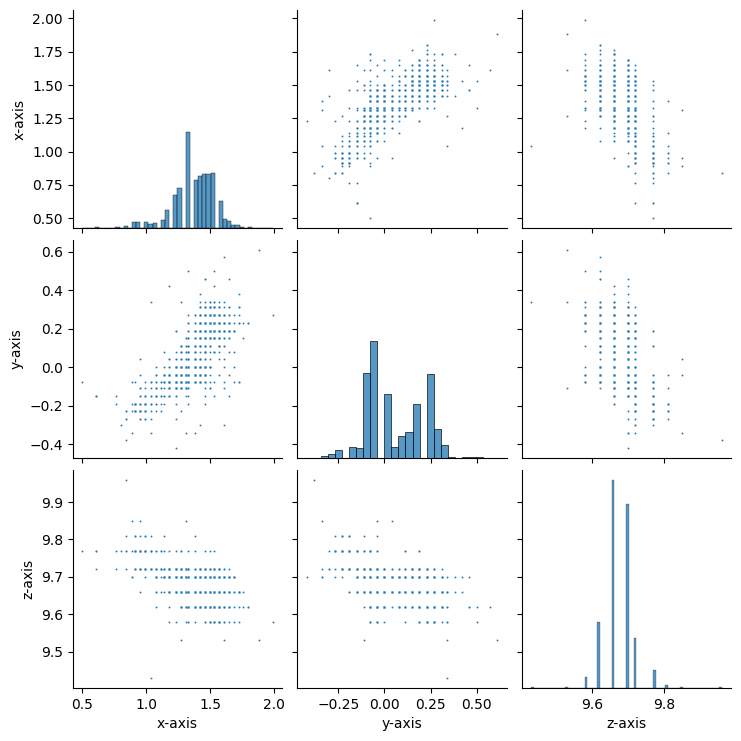

Standing :


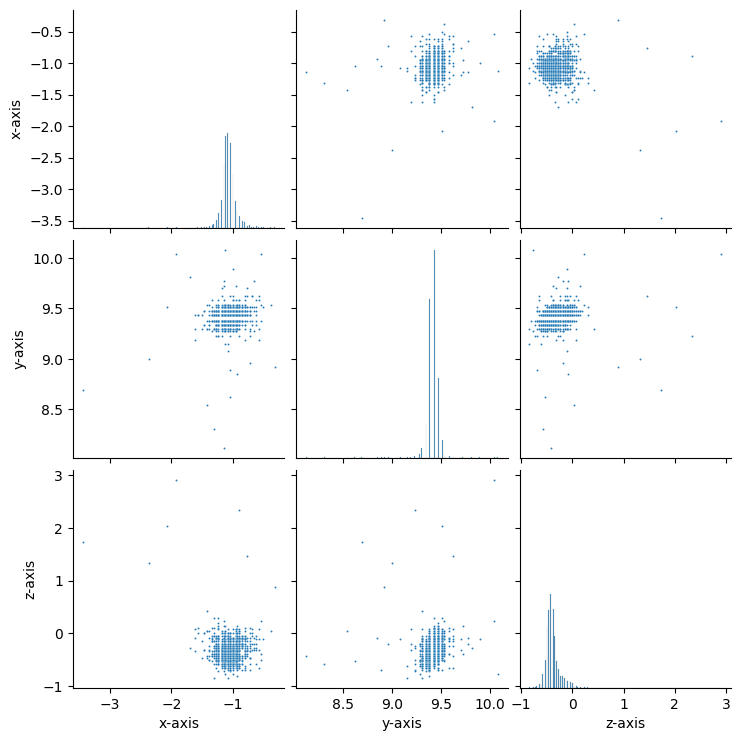

In [45]:
sel_user = 3
df_user = df[df.user == sel_user]
scatter_plots(sel_user, df_user)

In [46]:
stats_by_act = df_user.groupby('activity')[['x-axis', 'y-axis', 'z-axis']].std() # 표준편차 구한 값
stats_by_act
'''
walking ~ x-axis = 6.186944 값의 경우 평균을 ㄱ준으로 +- 6.18정도 값이 퍼져있음
'''

,x-axis,y-axis,z-axis
activity,,,
Downstairs,5.771033,5.208307,4.069624
Jogging,8.114999,7.966063,6.021514
Sitting,0.163183,0.149645,0.040073
Standing,0.125622,0.073809,0.175041
Upstairs,7.321590,6.639742,3.980631
Walking,6.186944,4.394928,3.907049


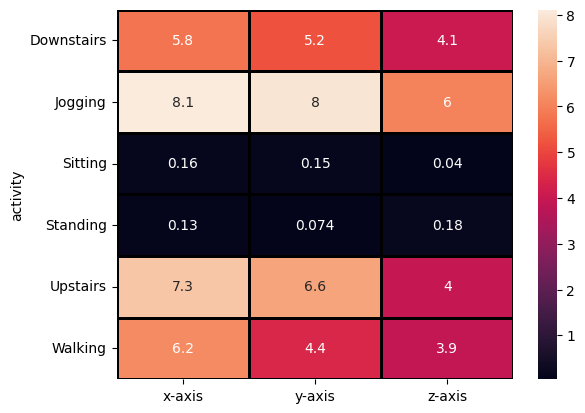

In [47]:
sns.heatmap(stats_by_act, annot = True, linewidths = 1, linecolor = 'black')
plt.show()
'''
위에서 구한 표준편차를 히트맵으로 표현함 (변동 값)
'''

### All User

Evaluate standard deviation now by user and activity:

In [48]:
stats_full = df.groupby(['activity', 'user'],
                        as_index = False)[['x-axis', 'y-axis', 'z-axis']].std()

In [49]:
pd.set_option('display.max_rows', 200)
stats_full

,activity,user,x-axis,y-axis,z-axis
0,Downstairs,1,8.061251,4.761467,3.978546
1,Downstairs,3,5.771033,5.208307,4.069624
2,Downstairs,4,4.149014,3.826414,3.752217
3,Downstairs,5,3.119087,4.166938,2.693416
4,Downstairs,6,2.716701,3.754298,2.130593
5,Downstairs,7,5.157740,5.033377,2.810944
6,Downstairs,8,5.329682,4.501764,2.855786
7,Downstairs,10,3.576326,4.185330,4.212609
8,Downstairs,11,3.725861,9.745773,2.363278
9,Downstairs,12,3.813784,5.480537,4.657947


In [51]:
fig = px.scatter_3d(data_frame = stats_full,
                    x = 'x-axis', y = 'y-axis', z = 'z-axis',
                    color = 'activity',
                    opacity = 0.25)
fig.update_layout(title = '')
fig.show()

In [52]:
stats_full_mean_std = stats_full.groupby('activity')[['x-axis', 'y-axis', 'z-axis']].mean()
stats_full_mean_std

,x-axis,y-axis,z-axis
activity,,,
Downstairs,4.264054,4.541456,3.240970
Jogging,8.044195,8.374622,5.585056
Sitting,0.315291,0.284248,0.288881
Standing,0.496411,0.294802,0.499241
Upstairs,4.200767,4.314794,3.116068
Walking,4.603113,4.515043,3.718029


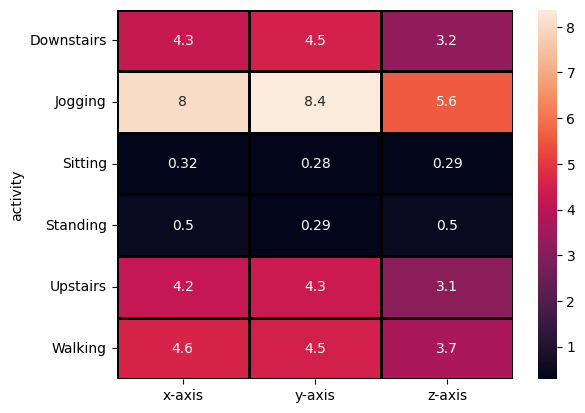

In [53]:
sns.heatmap(stats_full_mean_std,
            annot = True, linewidths = 1, linecolor = 'black')
plt.show()